# Exercise 1: Principal Component Analysis

The goal is to apply PCA to a couple of datasets and to understand the results. 
The code is written in Python, and it is run on Google Colab.

## Google Colab

Colab is a service that hosts Jupyter notebooks, which provides the computing resources (also GPUs). You don't need to install anything locally, because Colab provides a remote machine that will run your python code. 
Jupyter notebooks are files which support both text and code. The code runs in multiple cells, which is very convenient because it let us compartmentalize the script.

## Python

Python is a (very) high-level programming language, which is interpreted at run-time instead of being compiled. This means that we can run the code without needing to compile it first. 
Python is very popular in machine learning because it offers a huge number of libraries that we can use to build machine-learning and deep learning models. Also, it is a dynamically typed language, meaning that we do not need to define the type of variable before assignment.

### A brief intro to Python

In [1]:
# create some variables
a = 3.2 # this is a float
b = 'test' # this is a string
c = [1, 2, 3] # this is a list

print(type(a)) # check the type

<class 'float'>


In [3]:
# do some math
a = 3.2
b = 7.4

c = a * b # multiplication
d = a / b # division
e = a ** b # exponentiation

## Numpy

Everything that we do in machine learning is linear algebra (matrix multiplication). Numpy is a python library specialised for operations on arrays (vectors, matrices and N-dimensional tensors). Numpy is widely used, and it is pre-installed on Colab.

* The default shape of an array of length n is given by *(n,)*. You can apply the *.reshape* method to reorganise the array into a given (n_row, n_col) configuration.
* You can use *-1* to infer the shape dimension from the length of the array
* *.reshape(-1)* is equivalent to *.ravel()* or *.flatten()* and allows to flatten an array

> It is strongly recommended to keep in mind the dimensions of the arrays (vectors or matrices) used to avoid errors (which are sometimes not visible!)

In [13]:
# import the library
import numpy as np

# Create a 1D array (vector)
array = np.array([1, 2, 3]) # Neither a row neither a column, only a 1D array with a given length
array_row = array.reshape(1, -1) # (row, col)
array_col = array.reshape(-1, 1)

print(f'array shape: {array.shape}')
print(f'array_row shape: {array_row.shape}')
print(f'array_col shape: {array_col.shape}')

# Create a 2D array (matrix)
matrix = np.array([[1, 2, 3],
                  [4, 5, 6]])

print(f'matrix shape: {matrix.shape}')

# Transpose of a matrix
matrix_transposed = matrix.T # <!> Not the same as matrix.reshape(3, 2) <!>
print(matrix_transposed)

# Flatten the matrix 
matrix_flattened = matrix.reshape(-1,) # Or matrix.ravel()
print(matrix_flattened)

# NB: len(matrix) will gives the number of items in the matrix, which is then considered as a list -> returns the number of rows of this list


array shape: (3,)
array_row shape: (1, 3)
array_col shape: (3, 1)
matrix shape: (2, 3)
[[1 4]
 [2 5]
 [3 6]]
[1 2 3 4 5 6]


In [16]:
# perform some multiplications
A = np.array([[1, 2, 3],
            [4, 5, 6]]) # (2, 3)

B = np.array([[13, 12],
             [12, 13],
             [13, 12]]) # (3, 2)

# matrix multiplication
C = A @ B # Or A.dot(B) -> Both will return a numpy.ndarray

print(C)

[[ 76  74]
 [190 185]]


In [20]:
# access the value of the arrays or store values [row, col]
k1 = array[0]
print(k1)

array[2] = 0
print(array)

k2 = B[2, 1]
print(k2)

k3 = A[:, 0]
print(k3)

1
[1 2 0]
12
[1 4]


## Cycles and functions

The command `for` is used to create a cycle, while the command `def` is used to define a function.

In [ ]:
# For cycle
for i in range(10):
    print(i, end=' ') # the end attribute defines the last parameter printed (default = '\n')

0 1 2 3 4 5 6 7 8 9 

In [21]:
# Define functions
def multip(a, b):
    temp = a*b
    return temp

a = 10
b = 3

print(multip(a, b))

30


## Matplotlib

Another useful python library is Matplotlib, which is used to visualize the data. Like Numpy, Matplotlib is widely used and it is generally pre-installed.

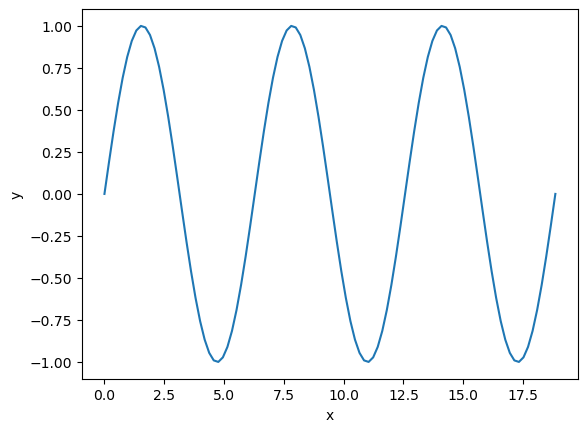

In [25]:
import matplotlib.pyplot as plt

x = np.linspace(0, 6 * np.pi, 100) # this is used to create an array from 0 to 6pi containing 100 points regularly spaced
y = np.sin(x) # compute the sine of x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Linspace or Arange ?

&rarr; Use *np.linspace* when you want to control the length of the array! The step will follow ...

&rarr; Use *np.arange* when you want to impose the step size! The length will follow ...

In [23]:
# Example
x_linspace = np.linspace(0, 10, 20) # Length
x_arange = np.arange(0, 10, 10/20) # Step

print(x_linspace)
print(x_arange, end='\n\n')
# Both arrays have the same length 20!
print(x_linspace.shape)
print(x_arange.shape)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]

(20,)
(20,)


## Exercise 1: toy dataset

We want to test PCA on a toy dataset. The dataset contains 2 variables $x$ and $y$. The second variable is a linear function of the first one, but it is corrupted with Gaussian noise. PCA should be able to identify the direction of maximum variance (the first PC) and relegate the noise in the last PC.

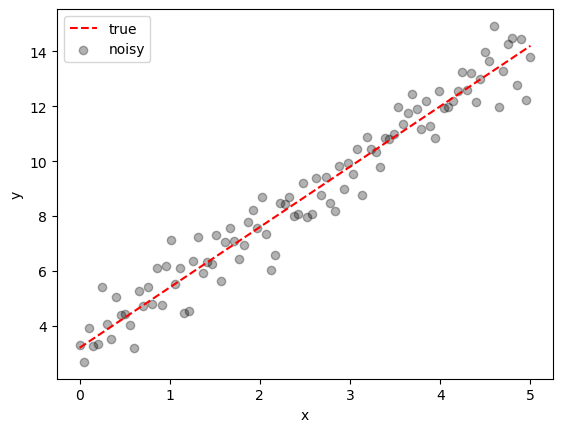

In [28]:
# create the x and y variables
n_points = 100
n_variables = 2

x = np.linspace(0, 5, n_points)
y_true = 3.2 + 2.2*x

rng = np.random.default_rng(121421321) # Build a generator with a given (initial) seed that will provides a stream of (pseudo-)random values, following a given distribution (here: gaussian)
# Assume a random white noise that follows a gaussian distribution with fixed std (homoscedastic case)
noise = rng.normal(loc=0, scale=0.75, size=n_points) # loc = mean, scale = std
# Question: What happens if the std is no longer constant and depends on x ? Try by modifying the value of the scale attribute (heteroscedastic case)

y_noise = y_true + noise

plt.plot(x, y_true, c='r', ls='--', label='true')
plt.scatter(x, y_noise, c='k', alpha=0.3, label='noisy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [27]:
# create the dataset
D = np.zeros((n_points, n_variables)) # empty matrix

# this operation is called slicing and it is used to put or extract values from an array
D[:, 0] = x # put x in the first column (0) of the array
D[:, 1] = y_noise

print(D.shape) # Dataset

(100, 2)


## PCA algorithm

To find the PCs, we need to follow these steps:
- Center and scale the dataset:
\begin{equation}
\mathbf{D}_0 = (\mathbf{D} - \mathbf{D}_{\mu})\mathbf{D}^{-1}_{\sigma}
\end{equation}


- Compute the covariance matrix:
\begin{equation}
\mathbf{K} = \mathbf{D}_0^T\mathbf{D}_0 
\end{equation}

- Compute the eigendecomposition of the covariance matrix:
\begin{equation}
\mathbf{K} = \mathbf{A} \mathbf{L} \mathbf{A}^T 
\end{equation}

- Sort the eigenvectors in descending order of eigenvalues.

- Transform the scaled dataset:
\begin{equation}
\mathbf{Z} = \mathbf{D}_0 \mathbf{A}
\end{equation}

- The original dataset can be reconstructed as:

\begin{equation}
\mathbf{D} = (\mathbf{Z} \mathbf{A}^T)\mathbf{D}_{\sigma} + \mathbf{D}_{\mu}
\end{equation}

In [29]:
# To do: center and scale the dataset

# Hints:
# - Create two matrices D_m and D_s using np.mean() and np.std()
# - Compute the inverse of D_s using np.linalg.inv() -> Why doesn't it work straight away? How can you make it work (without AI)?
# - Use the command @ to multiply the matrices

In [30]:
# To do: compute the covariance matrix

# Hint: 
# - Use the function np.transpose() or simply the .T method to transpose the matrix

In [31]:
# To do: compute the eigendecomposition of the covariance matrix and sort the eigenvalues and eigenvectors in decreasing order

# Hint:
# - Use the function np.linalg.eig() to compute the eigendecomposition
# - Use np.argsort() to sort the eigenvectors

In [32]:
# To do: compute the transformed dataset 

In [33]:
# To do: reconstruct the dataset and plot it against the original one

In [34]:
# To do: 
# - compress the dataset by removing the last PC,
# - reconstruct the dataset with the compressed representation

In [35]:
# To do: create a python function that takes the data as input and computes the PCA, returning Z, L, A as output

## Singular value decomposition

The PCA can be computed also by applying the SVD to the dataset:
\begin{equation}
\mathbf{D}_0 = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T
\end{equation}

in which:
- $\mathbf{A} = \mathbf{V}$,
- $\mathbf{L} = \boldsymbol{\Sigma}^2$,
- $\mathbf{u}_i = \frac{\mathbf{z}_i}{||\mathbf{z}_i||}$

In [36]:
# To do: check if this is true

# Hint:
# - Use np.linalg.svd(D0, full_matrices=False) to compute the svd

## Scikit-learn

Scikit-learn is a python library that contains many machine-learning models, including PCA. It can also handle centering and scaling more naturally. However, we need to install it first because it is not included in Colab.

In [ ]:
! pip install scikit-learn

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# To do: use sklearn to compute PCA

# Hint:
# - Use StandardScaler to center and scale the data

## A more complex example

We now want to apply PCA to the "wine dataset". This dataset contains 178 samples with 13 different features. All the wines are categorized in 3 classes.

In [ ]:
# Import the dataset
from sklearn.datasets import load_wine

wine_data = load_wine().data
n_samples, n_features = wine_data.shape

wine_features = load_wine().feature_names
wine_classes = load_wine().target

print(wine_data.shape)
print(wine_features)
print(wine_classes)

In [ ]:
# To do: visualize the dataset

# Hint:
# - Use plt.scatter() to plot the distribution of 'alcohol' and 'malic_acid'
# - Color the scatter using wine_classes


In [ ]:
# To do: compute the PCA and show the distribution of the explained variance

# Hint:
# - Use pca.explained_variance_ratio_ to get the explained variance
# - Use np.cumsum() to compute the cumulative variance

In [ ]:
# To do: visualize the first 2 PCs and color them by the wine class

In [ ]:
# To do: visualise the scores of the PCs

# Hint:
# - Use plt.bar() to plot a bar plot

## Outlier detection

We can use PCA to detect probable outliers in a dataset. We consider a toy dataset containing 2 features ($x$ and $y$) and 100 samples. For the first 95 samples, $x$ is in the range $[0, 10]$ and $y = 4x + 2 + \epsilon$, where $\epsilon$ is Gaussian noise with $\mu = 0 $ and $\sigma = 2.5$. The last 5 points are outliers with $x_{\mathrm{out}}$ is in the range $[2, 3]$ and $y_{\mathrm{out}} = 3 x^2 + x + 10 + \epsilon_{\mathrm{out}}$, where $\epsilon_{\mathrm{out}}$ is Gaussian noise with $\mu_{\mathrm{out}} = 0 $ and $\sigma_{\mathrm{out}} = 5$

In [ ]:
# First we import the libraries 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# To do: 
# - create 95 correct samples with x in range [0, 10] and y = 4*x + 2 + noise
# - create 5 outliers with x_outl in range [2, 3] and y_outl = 3*x_outl**2 + x_outl + 10 + noise_outl


# Hint:
# - to create a evenly spaced array, you can use the function np.linspace(start, stop, n_points)
# - to create the noise array, you can use the function np.random.normal(mu, sigma, size=n_points)

# this command is used to set a fixed seed for random sampling, 
# so that we have the same result when re-running the code.
np.random.seed(1) 

In [ ]:
# To do:
# - Create an empty matrix D of size (n_points + n_outl, 2)
# - Put the true values and the outliers in the matrix, using column 0 for x and column 1 for y

# Hint:
# - You can use the function np.empty((n, 2)) to create an empty matrix
# - You can use np.concatenate([a, b]) to concatenate vector a and b


In [25]:
from sklearn.decomposition import PCA

# To do:
# - Center and scale the matrix D
# - Perform PCA
# - Plot the scores 

# Hints:
# - To center the matrix D, subtract the mean of each column from each column
# - To scale the matrix D, divide each column of the centered matrix by the standard deviation of each column

To find the outliers, we build a classifier using the 2nd PC. To do that, we compute the empirical cumulative distribution function (ecdf) of PC scores squared divided by the corresponding eigenvalue (Mahalanobis distance):

\begin{equation}
d_{M, i} = \frac{z^2_{i,2}}{l_2}
\end{equation}

\begin{equation}
\mathrm{edfc}(t) = \sum_{j = 1}^k d_{M, j} < t
\end{equation}

In [ ]:
# To do:
# - Calculate the Mahalanobis distance using PC2 
# - Compute the cumulative distribution
# - Set a threshold

def ecdf(pc):
    i_sort = np.argsort(pc)
    pc_sort = pc[i_sort]
    dist_sort = np.arange(1, pc_sort.size+1)/pc_sort.size
    return i_sort, pc_sort, dist_sort

# i_sort, pc2_sort, dist_sort = ecdf(dm_pc2)
# threshold = 0.95

In [ ]:
# To do:
# - Apply the threshold to find the outliers